In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn missingno

# Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load and Combine the data



In [19]:
# STEP 3: Load dataset
df = pd.read_csv("kaggle_survey_2017_2021.csv", low_memory=False)

print("Dataset loaded successfully ✅")
print("Shape (rows, columns):", df.shape)

# Show first 5 rows
display(df.head())



Dataset loaded successfully ✅
Shape (rows, columns): (106302, 293)


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Quick Inspction

In [20]:
# STEP 4: Quick dataset overview
print("\n📌 Dataset Info:")
print(df.info())

print("\n📌 Missing values (top 10 columns):")
print(df.isna().sum().sort_values(ascending=False).head(10))

print("\n📌 Summary statistics (numeric cols):")
display(df.describe())



📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB
None

📌 Missing values (top 10 columns):
Q38_B_Part_11    106301
Q34_B_Part_16    106301
Q9_Part_12       106301
Q7_Part_12       106301
Q14_Part_11      106301
Q16_Part_17      106301
Q10_Part_16      106301
Q32_B_Part_20    106301
Q19_Part_5       106301
Q18_Part_6       106301
dtype: int64

📌 Summary statistics (numeric cols):


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
count,106302,89586,105857,106207,106181,103319,99088,92786,65943,20885,...,2212,2761,1128,1022,7439,1287,1218,1186,1,629
unique,6,11716,12,10,78,13,36,21,2,2,...,2,2,2,2,2,2,2,2,1,2
top,2021,498,25-29,Male,India,Masterâ€™s degree,Student,3-5 years,Python,R,...,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Domino Model Monitor,"In the next 2 years, do you hope to become mor...",Other
freq,25973,107,23748,49178,25192,37395,21242,15995,65942,20884,...,2211,2760,1127,1021,7438,1286,1217,1185,1,628


# Data cleaning

In [21]:
# STEP 5: Data Cleaning
print("\nRemoving duplicates...")
df = df.drop_duplicates()
print("New shape after duplicate removal:", df.shape)

print("\nRenaming columns...")
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]
print("First 5 column names:", df.columns[:5])

print("\nHandling missing values...")
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(include=[np.number]).columns

df[cat_cols] = df[cat_cols].fillna("Missing")
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

print("Missing values after cleaning:", df.isna().sum().sum())



Removing duplicates...
New shape after duplicate removal: (101846, 293)

Renaming columns...
First 5 column names: Index(['-', 'time_from_start_to_finish_(seconds)', 'q1', 'q2', 'q3'], dtype='object')

Handling missing values...
Missing values after cleaning: 0


# Simple transformations



In [23]:
# STEP 6: Simple Transformations
if "gender" in df.columns:
    df["gender"] = df["gender"].str.lower().replace({
        "male":"Male","m":"Male","female":"Female","f":"Female"
    })
    print("\nGender counts:")
    print(df["gender"].value_counts().head())

if "salary" in df.columns:
    import re
    def parse_salary(x):
        if pd.isna(x): return np.nan
        s = re.sub(r"[^\d\-]", "", str(x))
        if "-" in s:
            parts = [p for p in s.split("-") if p.isdigit()]
            if parts:
                return np.mean([float(p) for p in parts])
        return pd.to_numeric(s, errors="coerce")
    df["salary_num"] = df["salary"].apply(parse_salary)
    print("\nSalary column transformed ✅")


# EDA (Exploratory Data Analysis)

In [24]:
# STEP 7: EDA (Exploratory Data Analysis)
if "country" in df.columns:
    print("\nTop 5 Countries:")
    print(df["country"].value_counts().head(5))

if "job_role" in df.columns:
    print("\nTop 5 Job Roles:")
    print(df["job_role"].value_counts().head(5))

if "salary_num" in df.columns and "job_role" in df.columns:
    print("\nMedian Salary by Job Role (Top 5):")
    print(df.groupby("job_role")["salary_num"].median().sort_values(ascending=False).head(5))


In [28]:
print(df.columns)


Index(['-', 'time_from_start_to_finish_(seconds)', 'q1', 'q2', 'q3', 'q4',
       'q5', 'q6', 'q7_part_1', 'q7_part_2',
       ...
       'q38_b_part_1', 'q38_b_part_2', 'q38_b_part_3', 'q38_b_part_4',
       'q38_b_part_5', 'q38_b_part_6', 'q38_b_part_7', 'q38_b_part_9',
       'q38_b_part_11', 'q38_b_other'],
      dtype='object', length=293)


In [29]:
print(df['q1'].head())
print(df['q2'].head())
print(df['q3'].head())
print(df['q5'].head())


0    What is your age (# years)?
1                          50-54
2                          50-54
3                          22-24
4                          45-49
Name: q1, dtype: object
0    What is your gender? - Selected Choice
1                                       Man
2                                       Man
3                                       Man
4                                       Man
Name: q2, dtype: object
0    In which country do you currently reside?
1                                        India
2                                    Indonesia
3                                     Pakistan
4                                       Mexico
Name: q3, dtype: object
0    Select the title most similar to your current ...
1                                                Other
2                              Program/Project Manager
3                                    Software Engineer
4                                   Research Scientist
Name: q5, dtype: object


In [30]:
# Drop first row (questions text)
df = df.drop(0).reset_index(drop=True)


# Dashboard

/tmp/ipython-input-523658212.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="crest")
/tmp/ipython-input-523658212.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_roles.index, x=top_roles.values, palette="viridis")
/tmp/ipython-input-523658212.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette="mako")
/tmp/ipython-input-523658212.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

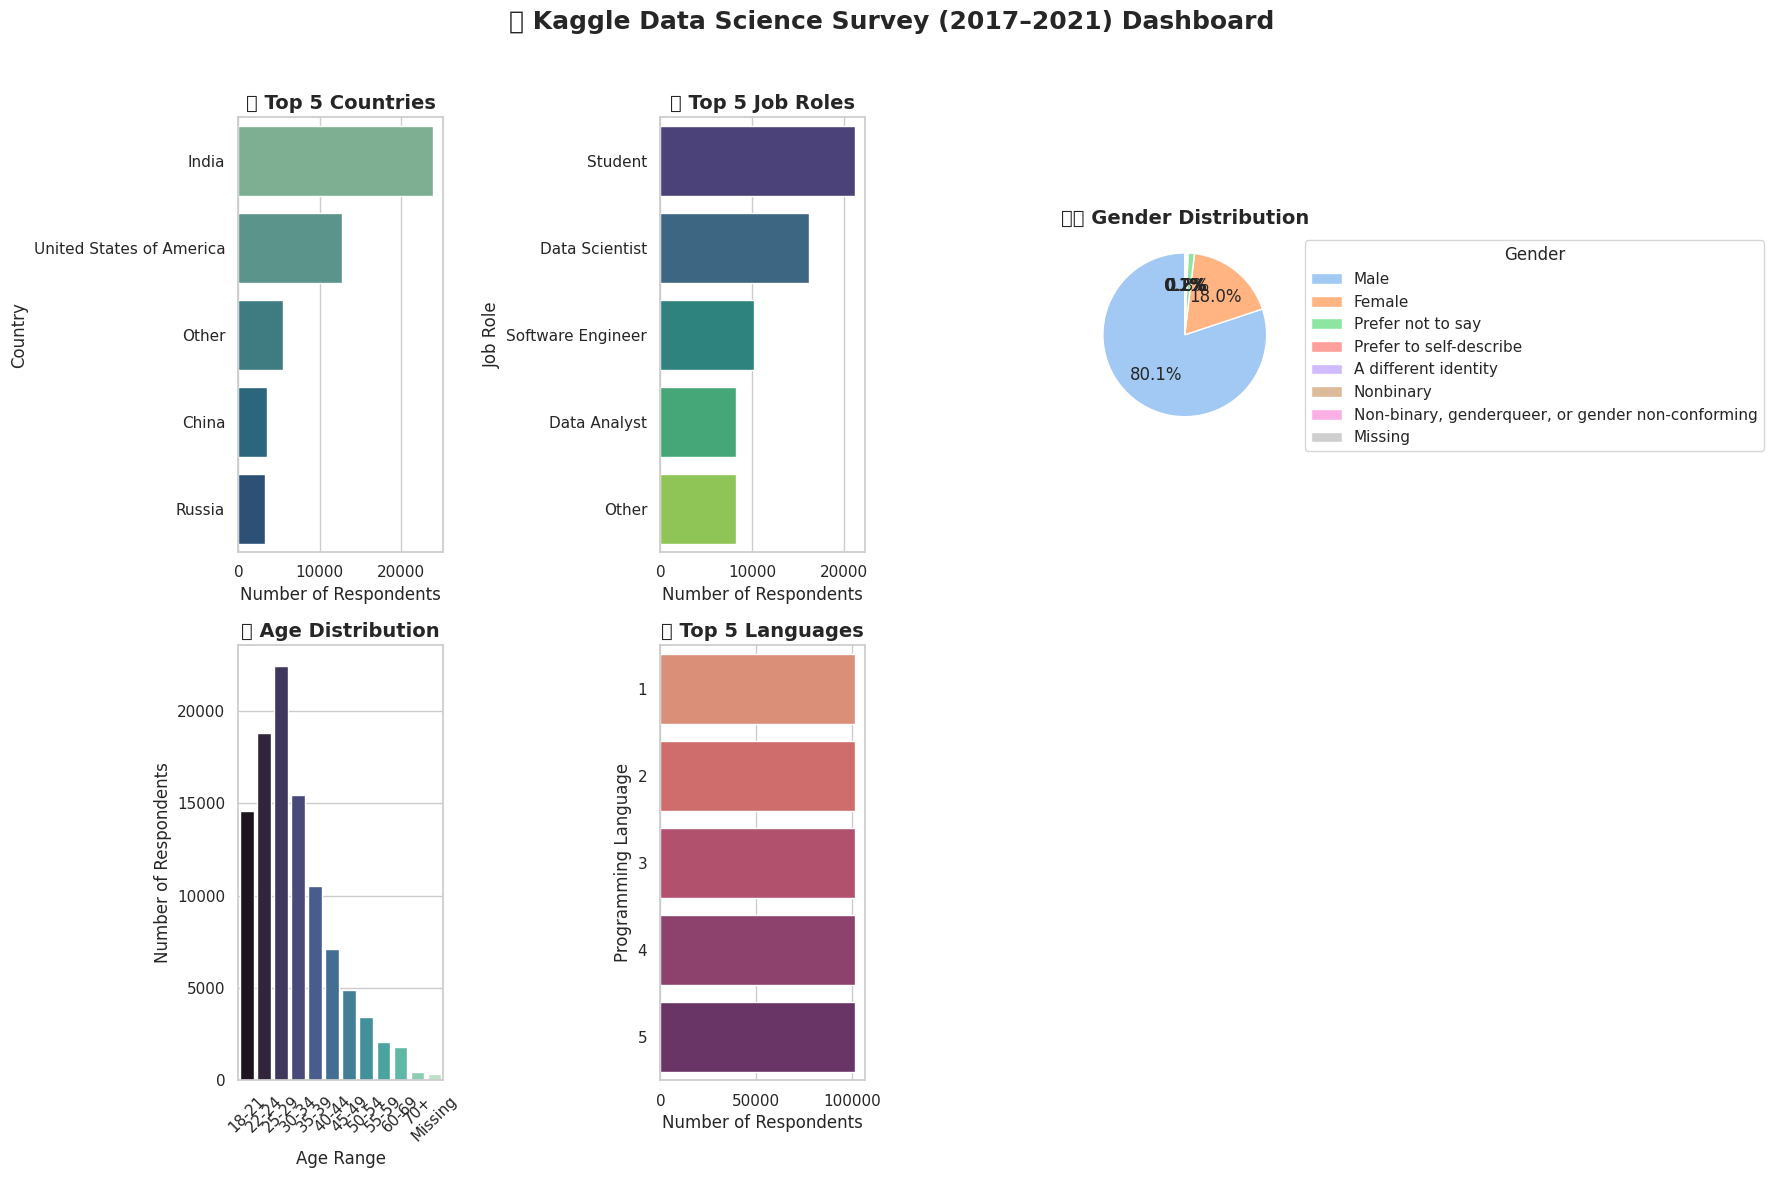

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Modern style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,12))
plot_num = 1

# 1. Top 5 Countries
top_countries = df["q3"].value_counts().head(5)
plt.subplot(2,3,plot_num)
sns.barplot(y=top_countries.index, x=top_countries.values, palette="crest")
plt.title("🌍 Top 5 Countries", fontsize=14, weight="bold")
plt.xlabel("Number of Respondents")
plt.ylabel("Country")
plot_num += 1

# 2. Top 5 Job Roles
top_roles = df["q5"].value_counts().head(5)
plt.subplot(2,3,plot_num)
sns.barplot(y=top_roles.index, x=top_roles.values, palette="viridis")
plt.title("💼 Top 5 Job Roles", fontsize=14, weight="bold")
plt.xlabel("Number of Respondents")
plt.ylabel("Job Role")
plot_num += 1

# 3. Gender Distribution (Fixed with Legend)
plt.subplot(2,3,plot_num)
gender_counts = df["q2"].replace({
    "Man": "Male",
    "Woman": "Female"
}).value_counts()

wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=None,  # remove labels from pie
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.legend(
    gender_counts.index,
    title="Gender",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)
plt.title("👩‍💻 Gender Distribution", fontsize=14, weight="bold")
plot_num += 1

# 4. Age Distribution
plt.subplot(2,3,plot_num)
age_counts = df["q1"].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, palette="mako")
plt.title("📊 Age Distribution", fontsize=14, weight="bold")
plt.xlabel("Age Range")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plot_num += 1

# 5. Programming Languages (Top 5)
q7_parts = [col for col in df.columns if col.startswith("q7_part")]
lang_counts = {}
for col in q7_parts:
    lang = col.replace("q7_part_", "")
    lang_counts[lang] = df[col].notna().sum()
lang_counts = dict(sorted(lang_counts.items(), key=lambda x: x[1], reverse=True)[:5])

plt.subplot(2,3,plot_num)
sns.barplot(y=list(lang_counts.keys()), x=list(lang_counts.values()), palette="flare")
plt.title("💻 Top 5 Languages", fontsize=14, weight="bold")
plt.xlabel("Number of Respondents")
plt.ylabel("Programming Language")
plot_num += 1

# Big Title
plt.suptitle("📊 Kaggle Data Science Survey (2017–2021) Dashboard", fontsize=18, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Save cleaned dataset

In [35]:
# STEP 9: Save cleaned dataset
df.to_csv("cleaned_kaggle_survey.csv", index=False)
print("Cleaned file saved as cleaned_kaggle_survey.csv ✅")


Cleaned file saved as cleaned_kaggle_survey.csv ✅
